In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D

from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils, generic_utils

import tensorflow as tf
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import preprocessing
from past.builtins import xrange

In [6]:
# image specification
img_rows,img_cols,img_depth=50,50,1

x_tr = []
x_count=[]

In [7]:
#only for count
listing = os.listdir('DATASET1/')
cou=0
for vid in listing:
    listing2 = os.listdir('DATASET1/'+vid)
    for vid2 in listing2:
        cou +=1
print(cou)

21783


In [8]:
listing = os.listdir('DATASET1/')
for vid in listing:
    print(vid)
    counter =0
    listing2 = os.listdir('DATASET1/'+vid)
    count2=0
    for vid2 in listing2:
        frames = []
        for k in xrange(1):
            img_array = cv2.imread('DATASET1/'+vid+'/'+vid2)  # convert to array
            frame=cv2.resize(img_array,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frames.append(gray)
        input=np.array(frames)
        #print input.shape
        ipt=np.rollaxis(np.rollaxis(input,2,0),2,0)
        #print ipt.shape
        x_tr.append(ipt)
        counter +=1
        
        if counter >= 1000:
            break;
    x_count.append([counter,int(vid)])

1
10
11
2
3
4
5
6
7
8
9


In [9]:
X_tr_array = np.array(x_tr)
num_samples = len(X_tr_array)
print(num_samples)

11000


In [10]:
x_count

[[1000, 1],
 [1000, 10],
 [1000, 11],
 [1000, 2],
 [1000, 3],
 [1000, 4],
 [1000, 5],
 [1000, 6],
 [1000, 7],
 [1000, 8],
 [1000, 9]]

In [11]:
X_tr_array.shape


(11000, 50, 50, 1)

In [12]:
# Assign Label to each class
label=np.ones((len(X_tr_array),),dtype = int)
minimum=0
maximum=-1
count=0
for i in range(len(x_count)):
    maximum += x_count[i][0]
    #print([minimum,maximum])
    label[minimum:maximum]= count
    minimum +=x_count[i][0]
    count +=1

In [13]:
train_data = [X_tr_array,label]

(X_train, y_train) = (train_data[0],train_data[1])
print('X_Train shape:', X_train.shape)

X_Train shape: (11000, 50, 50, 1)


In [14]:
train_set = np.zeros((num_samples, 1, img_rows,img_cols,img_depth))

for h in xrange(num_samples):
    train_set[h][0][:][:][:]=X_train[h,:,:,:]

In [15]:
patch_size = 15   

print(train_set.shape, 'train samples')

(11000, 1, 50, 50, 1) train samples


In [16]:
# CNN Training parameters

batch_size = 100
nb_classes = len(x_count)
nb_epoch = 5

In [17]:
import os
os.listdir('DATASET1/')

['1', '10', '11', '2', '3', '4', '5', '6', '7', '8', '9']

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
import os

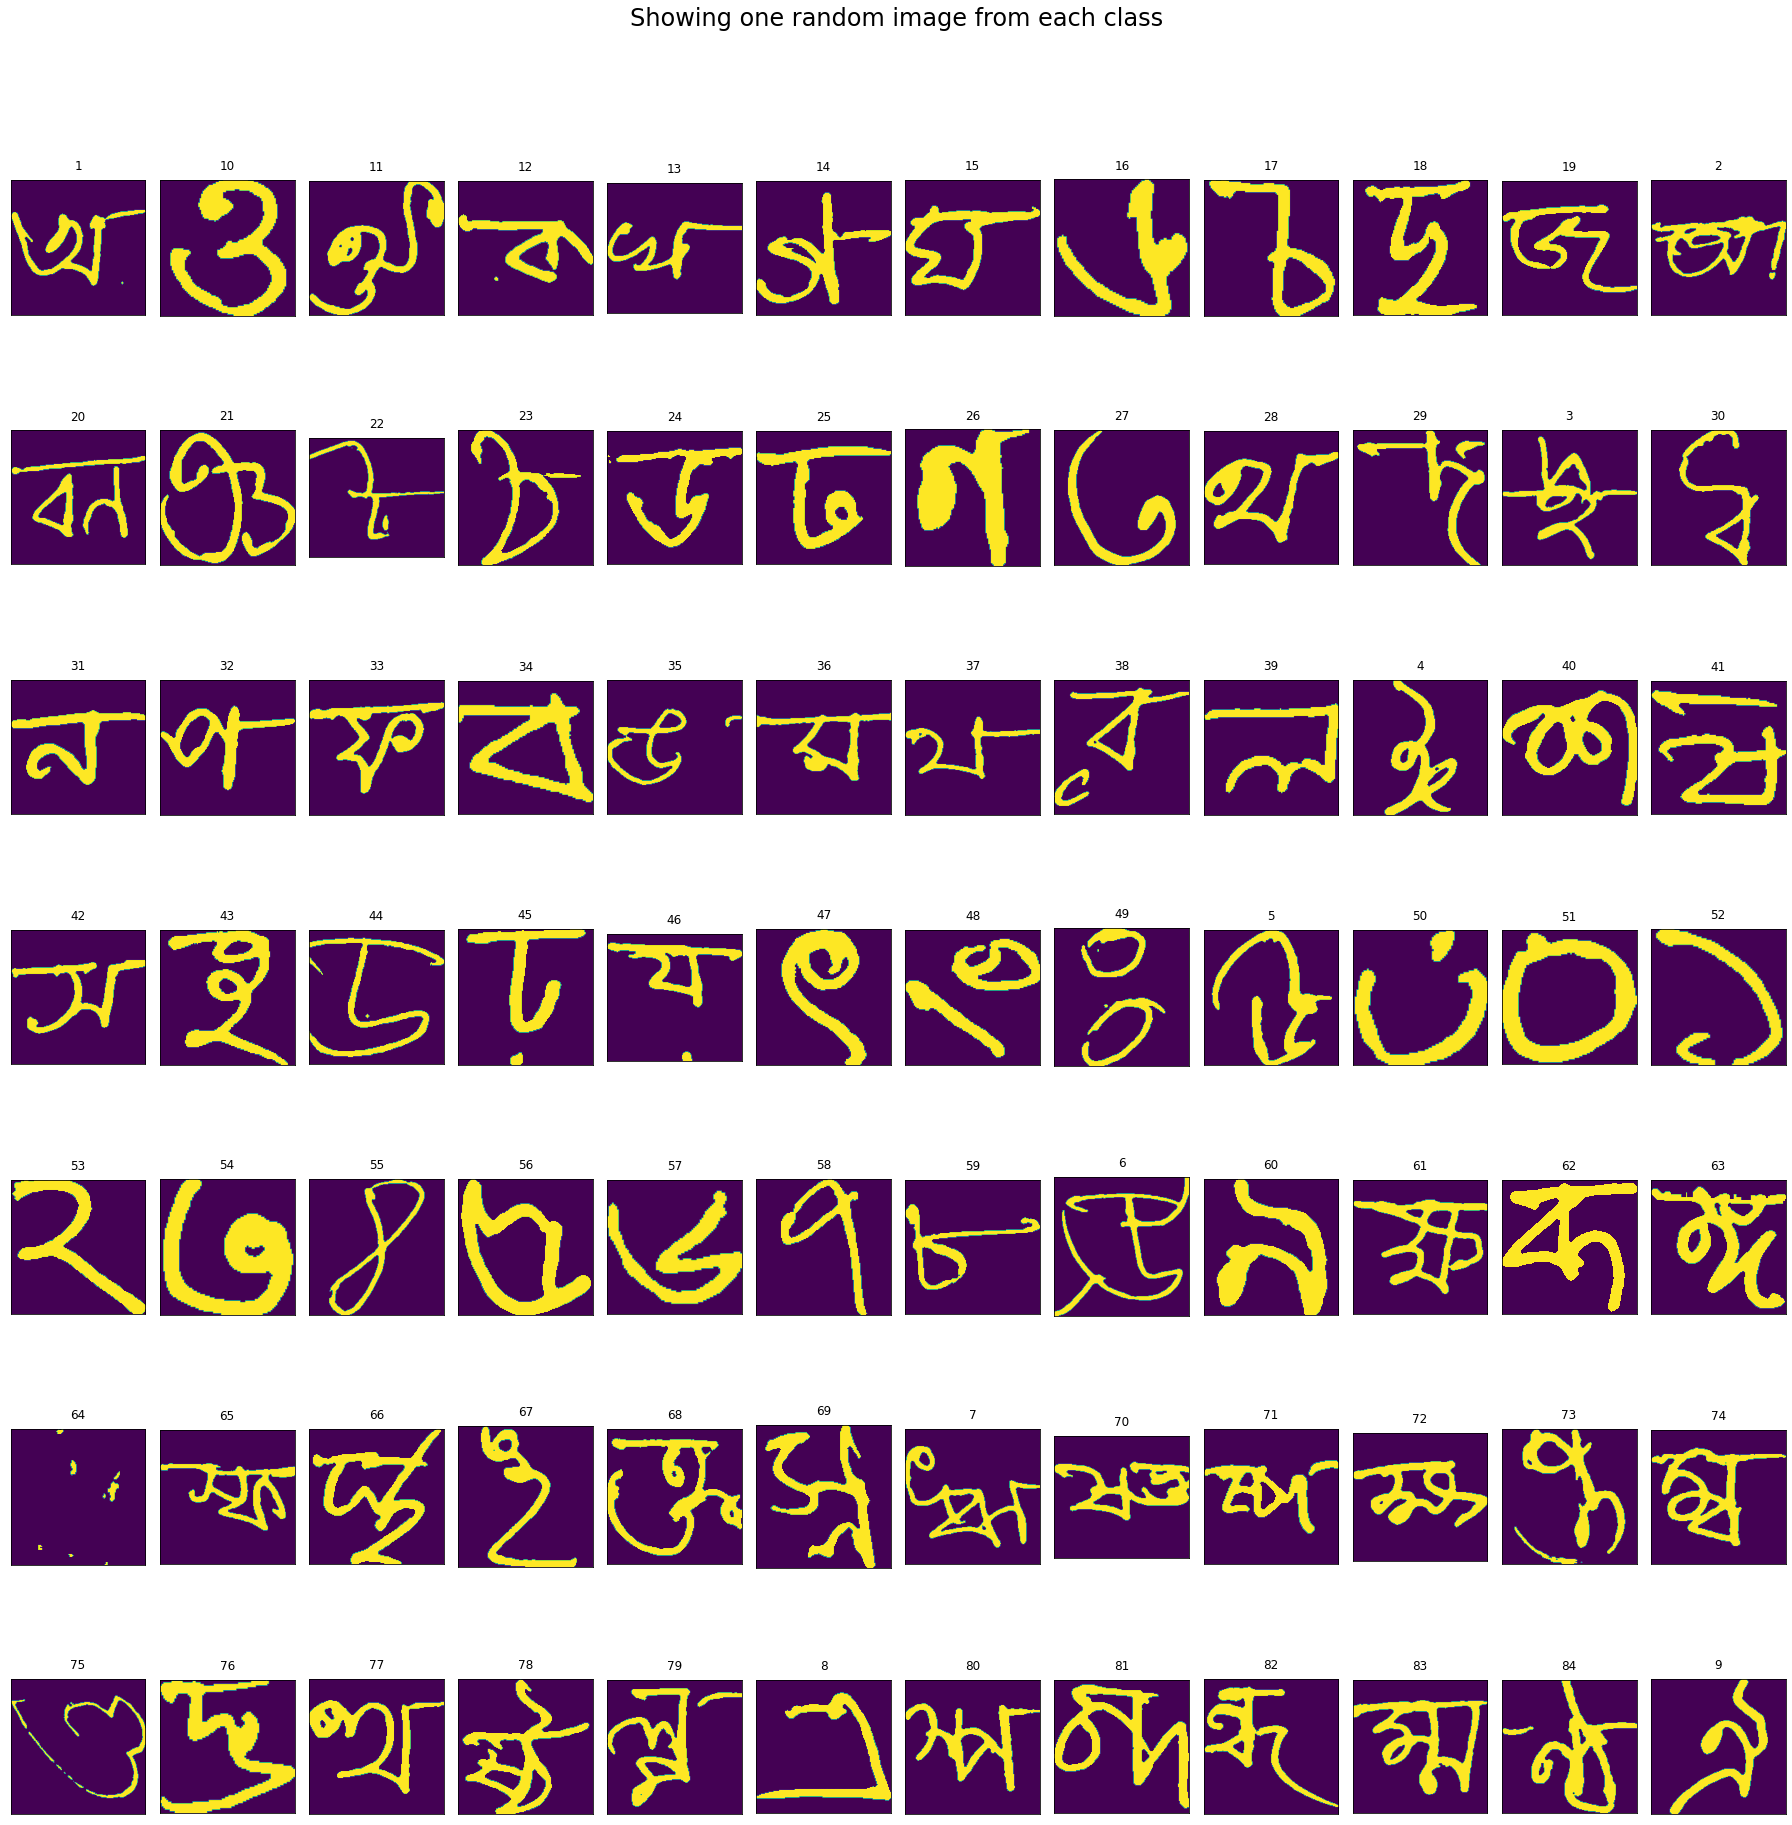

In [20]:
# Visualize the data, showing one image per class from 10 classes
rows = 7
cols = 12
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24)
data_dir = "DATASET/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected))
    food_selected_random = np.random.choice(food_selected_images)
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()

In [21]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)


# number of convolutional filters to use at each layer
nb_filters = [  32,   # 1st conv layer
                32    # 2nd
             ]

# level of pooling to perform at each layer (POOL x POOL)
nb_pool = [3, 3]

# level of convolution to perform at each layer (CONV x CONV)
nb_conv = [5,5]
# Pre-processing
train_set = train_set.astype('float32')
train_set -= np.mean(train_set)
train_set /= np.max(train_set)

In [22]:
# Split the data
X_train_new, X_val_new, y_train_new,y_val_new = train_test_split(train_set, Y_train, test_size=0.2, random_state=4)

In [24]:
char_list = os.listdir('DATASET1/')


print(char_list)

['1', '10', '11', '2', '3', '4', '5', '6', '7', '8', '9']


In [25]:
src_train = X_train_new
dest_train = y_train_new
src_test = X_val_new
dest_test = y_val_new

In [26]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
import numpy as np
    

In [27]:
import splitfolders 

In [29]:
import splitfolders  # or import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("DATASET1/", output="OUTPUT1", seed=1337, ratio=(.8, .2), group_prefix=None) # default values

# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
#splitfolders.fixed("DATASET1/", output="OUTPUT1", seed=1337, fixed=(100, 100), oversample=False, group_prefix=None) # default values


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  2.28 files/s]
Copying files: 31 files [00:00,  3.25 files/s]
Copying files: 62 files [00:00,  4.62 files/s]
Copying files: 96 files [00:00,  6.56 files/s]
Copying files: 130 files [00:00,  9.30 files/s]
Copying files: 159 files [00:00, 13.10 files/s]
Copying files: 189 files [00:01, 18.37 files/s]
Copying files: 217 files [00:01, 25.52 files/s]
Copying files: 245 files [00:01, 34.94 files/s]
Copying files: 272 files [00:01, 47.25 files/s]
Copying files: 301 files [00:01, 63.06 files/s]
Copying files: 330 files [00:01, 82.36 files/s]
Copying files: 359 files [00:01, 104.69 files/s]
Copying files: 388 files [00:01, 129.40 files/s]
Copying files: 429 files [00:01, 160.79 files/s]
Copying files: 460 files [00:02, 182.80 files/s]
Copying files: 490 files [00:02, 196.23 files/s]
Copying files: 518 files [00:02, 207.12 files/s]
Copying files: 545 files [00:02, 215.90 files/s]
Copying files: 579 files [00:02, 237.11 fil

Copying files: 4769 files [00:18, 301.20 files/s]
Copying files: 4800 files [00:18, 298.77 files/s]
Copying files: 4831 files [00:18, 293.72 files/s]
Copying files: 4861 files [00:18, 283.27 files/s]
Copying files: 4890 files [00:19, 265.18 files/s]
Copying files: 4918 files [00:19, 267.35 files/s]
Copying files: 4948 files [00:19, 275.82 files/s]
Copying files: 4976 files [00:19, 253.95 files/s]
Copying files: 5008 files [00:19, 264.50 files/s]
Copying files: 5035 files [00:19, 192.92 files/s]
Copying files: 5066 files [00:19, 215.88 files/s]
Copying files: 5105 files [00:19, 242.02 files/s]
Copying files: 5136 files [00:20, 258.44 files/s]
Copying files: 5166 files [00:20, 269.29 files/s]
Copying files: 5204 files [00:20, 285.08 files/s]
Copying files: 5235 files [00:20, 289.78 files/s]
Copying files: 5266 files [00:20, 282.06 files/s]
Copying files: 5296 files [00:20, 280.20 files/s]
Copying files: 5328 files [00:20, 289.69 files/s]
Copying files: 5358 files [00:20, 287.87 files/s]


Copying files: 9746 files [00:36, 239.54 files/s]
Copying files: 9784 files [00:36, 261.31 files/s]
Copying files: 9823 files [00:36, 280.29 files/s]
Copying files: 9859 files [00:36, 298.26 files/s]
Copying files: 9897 files [00:37, 306.79 files/s]
Copying files: 9929 files [00:37, 162.83 files/s]
Copying files: 9960 files [00:37, 187.55 files/s]
Copying files: 10001 files [00:37, 218.58 files/s]
Copying files: 10041 files [00:37, 246.30 files/s]
Copying files: 10075 files [00:37, 267.89 files/s]
Copying files: 10114 files [00:38, 285.54 files/s]
Copying files: 10148 files [00:38, 299.15 files/s]
Copying files: 10181 files [00:38, 306.76 files/s]
Copying files: 10214 files [00:38, 312.77 files/s]
Copying files: 10248 files [00:38, 307.17 files/s]
Copying files: 10288 files [00:38, 318.45 files/s]
Copying files: 10323 files [00:38, 326.36 files/s]
Copying files: 10357 files [00:38, 320.78 files/s]
Copying files: 10390 files [00:38, 319.99 files/s]
Copying files: 10425 files [00:39, 327

Copying files: 14737 files [00:54, 301.62 files/s]
Copying files: 14777 files [00:54, 314.51 files/s]
Copying files: 14809 files [00:54, 313.22 files/s]
Copying files: 14845 files [00:54, 314.64 files/s]
Copying files: 14877 files [00:54, 309.24 files/s]
Copying files: 14909 files [00:54, 309.81 files/s]
Copying files: 14941 files [00:55, 304.17 files/s]
Copying files: 14980 files [00:55, 315.28 files/s]
Copying files: 15020 files [00:55, 324.98 files/s]
Copying files: 15054 files [00:55, 327.56 files/s]
Copying files: 15091 files [00:55, 326.09 files/s]
Copying files: 15124 files [00:55, 326.40 files/s]
Copying files: 15157 files [00:55, 285.87 files/s]
Copying files: 15189 files [00:55, 291.81 files/s]
Copying files: 15230 files [00:55, 310.49 files/s]
Copying files: 15266 files [00:56, 322.64 files/s]
Copying files: 15306 files [00:56, 329.61 files/s]
Copying files: 15340 files [00:56, 329.31 files/s]
Copying files: 15379 files [00:56, 338.25 files/s]
Copying files: 15417 files [00:

Copying files: 19710 files [01:11, 313.11 files/s]
Copying files: 19742 files [01:11, 284.37 files/s]
Copying files: 19776 files [01:11, 295.42 files/s]
Copying files: 19807 files [01:12, 151.51 files/s]
Copying files: 19843 files [01:12, 182.89 files/s]
Copying files: 19879 files [01:12, 213.91 files/s]
Copying files: 19917 files [01:12, 245.63 files/s]
Copying files: 19954 files [01:12, 272.24 files/s]
Copying files: 19994 files [01:12, 296.96 files/s]
Copying files: 20029 files [01:13, 309.40 files/s]
Copying files: 20064 files [01:13, 302.54 files/s]
Copying files: 20097 files [01:13, 301.19 files/s]
Copying files: 20129 files [01:13, 304.21 files/s]
Copying files: 20163 files [01:13, 311.78 files/s]
Copying files: 20201 files [01:13, 321.23 files/s]
Copying files: 20234 files [01:13, 210.39 files/s]
Copying files: 20263 files [01:13, 228.31 files/s]
Copying files: 20301 files [01:14, 251.84 files/s]
Copying files: 20332 files [01:14, 266.74 files/s]
Copying files: 20371 files [01:

In [30]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
import numpy as np



K.clear_session()

n_classes = 11
img_width, img_height = 50, 50
train_data_dir = 'output4/train'
validation_data_dir = 'output4/val'
nb_train_samples = 16000 #75750
nb_validation_samples = 4000 #25250
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(10,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='INCEPTION_DATASET1.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('HISTORY_DATASET1.log')

history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=1,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('MODEL DATASET1.hdf5')

Found 22380 images belonging to 15 classes.
Found 2763 images belonging to 14 classes.
Instructions for updating:
Please use Model.fit, which supports generators.


InvalidArgumentError:  logits and labels must be broadcastable: logits_size=[32,10] labels_size=[32,15]
	 [[node categorical_crossentropy/softmax_cross_entropy_with_logits (defined at <ipython-input-30-3d2698f123cc>:61) ]] [Op:__inference_train_function_17740]

Function call stack:
train_function


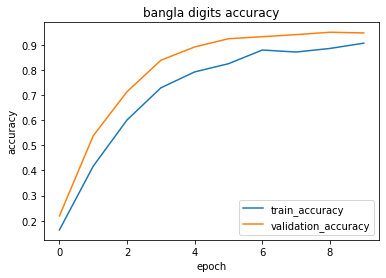

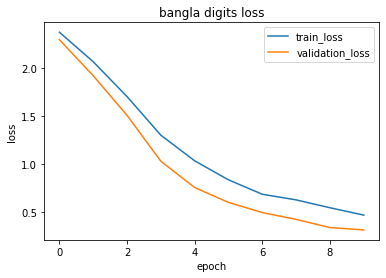

In [26]:
import matplotlib.pyplot as plt
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()


plot_accuracy(history,'bangla COMPLEX CHARACTER accuracy')
plot_loss(history,'bangla COMPLEX CHARACTER loss')

In [31]:
import keras.utils.vis_utils
from importlib import reload
reload(keras.utils.vis_utils)


from keras.utils.vis_utils import plot_model    
plot_model(model, to_file='INCEPTION.png', show_shapes=True, show_layer_names=True)

In [28]:
# Loading the best saved model to make predictions

import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model

K.clear_session()
model_best = load_model('MODEL DATASET4.hdf5',compile = False)

In [42]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    char_list.sort()
    pred_value = char_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

In [43]:
!wget -O 0.jpg https://i.ibb.co/FKz5PRD/image.jpg
!wget -O 1.jpg https://i.ibb.co/yXmS2FZ/1.jpg
!wget -O 2.jpg https://i.ibb.co/58FnzNn/2.jpg

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [44]:
!wget -O samosa.jpg http://veggiefoodrecipes.com/wp-content/uploads/2016/05/lentil-samosa-recipe-01.jpg
!wget -O pizza.jpg http://104.130.3.186/assets/itemimages/400/400/3/default_9b4106b8f65359684b3836096b4524c8_pizza%20dreamstimesmall_94940296.jpg
!wget -O omelette.jpg https://www.incredibleegg.org/wp-content/uploads/basic-french-omelet-930x550.jpg

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [45]:
from PIL import Image
img0 = Image.open('0.jpg')
img1 = Image.open('1.jpg')
img2 = Image.open('2.jpg')
img3 = Image.open('3.jpg')
img4 = Image.open('4.jpg')
img5 = Image.open('5.jpg')
img6 = Image.open('6.jpg')
img7 = Image.open('7.jpg')
img8 = Image.open('8.jpg')
img9 = Image.open('9.jpg')

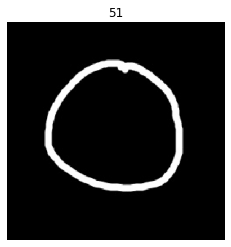

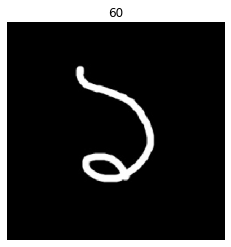

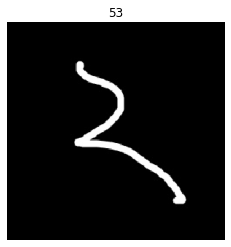

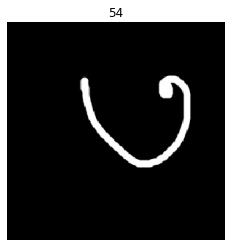

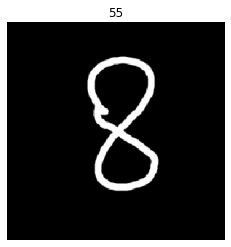

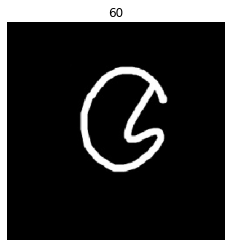

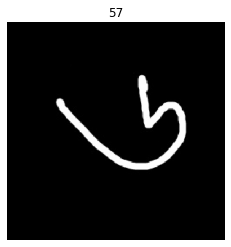

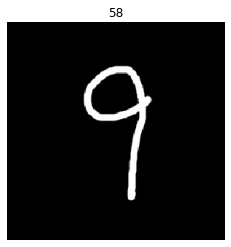

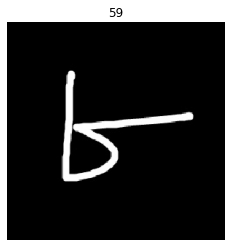

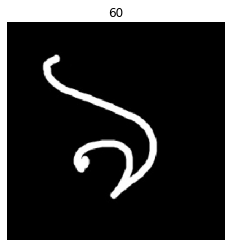

In [46]:
images = []
images.append('0.jpg')
images.append('1.jpg')
images.append('2.jpg')
images.append('3.jpg')
images.append('4.jpg')
images.append('5.jpg')
images.append('6.jpg')
images.append('7.jpg')
images.append('8.jpg')
images.append('9.jpg')
predict_class(model_best, images, True)